In [1]:
#import librares
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#import dataset
data=pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [5]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [7]:
data.shape

(400, 11)

In [10]:
#outlier check

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


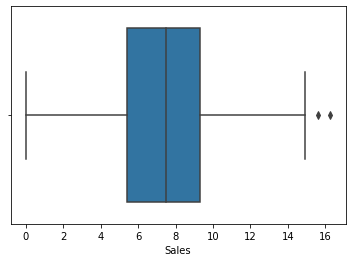

In [11]:
import seaborn as sns
ax = sns.boxplot(data['Sales'])

In [12]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


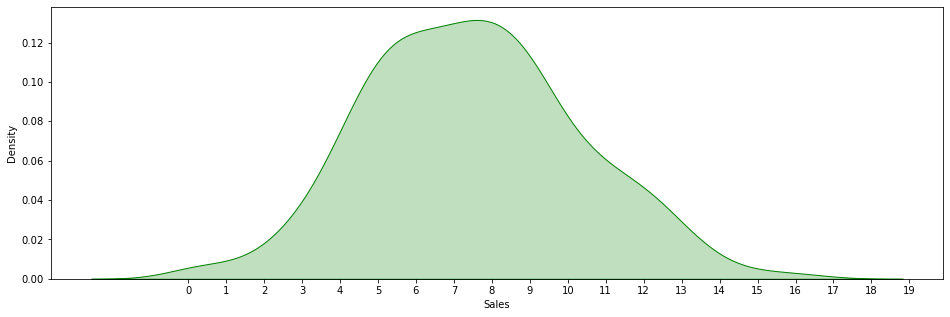

In [13]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(data['Sales'].skew()))
print("Kurtosis: {}".format(data['Sales'].kurtosis()))
ax = sns.kdeplot(data['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

In [14]:
#skew is righr
#kurtosis is negative

In [16]:
obj_colum = data.select_dtypes(include='object').columns.tolist()

<ipython-input-18-957d7db034e1>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i)
<ipython-input-18-957d7db034e1>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i)


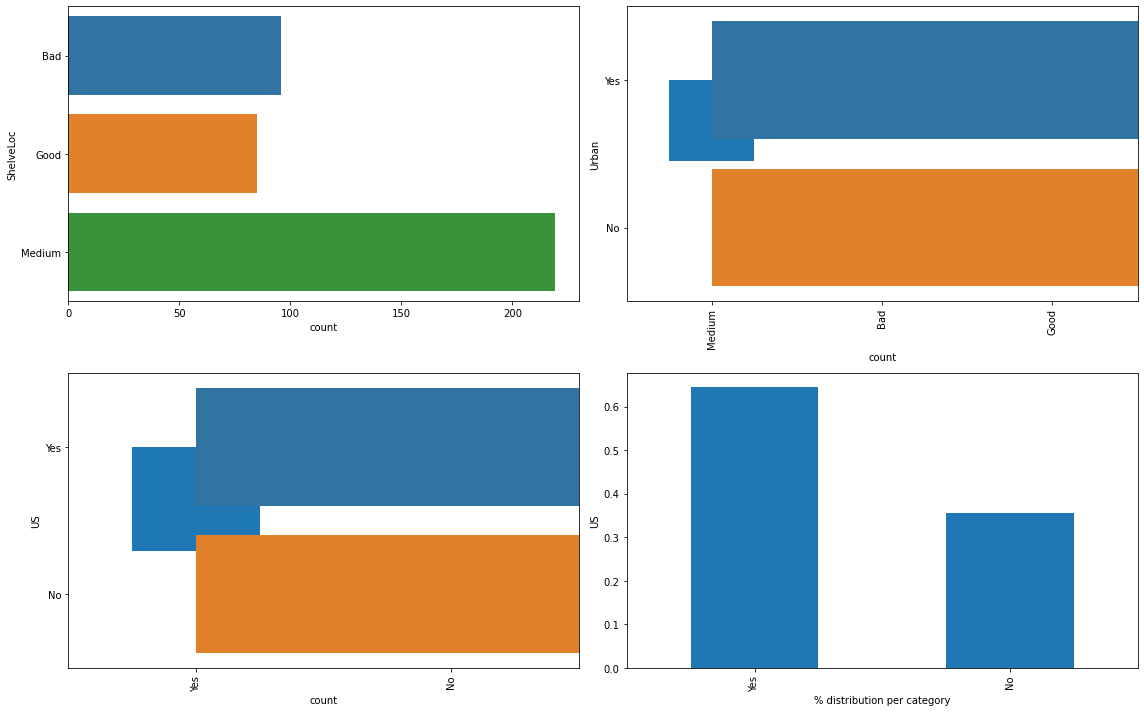

In [18]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=data,y=col)
    plt.subplot(2,2,i+1)
    data[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [19]:
num_columns = data.select_dtypes(exclude='object').columns.tolist()

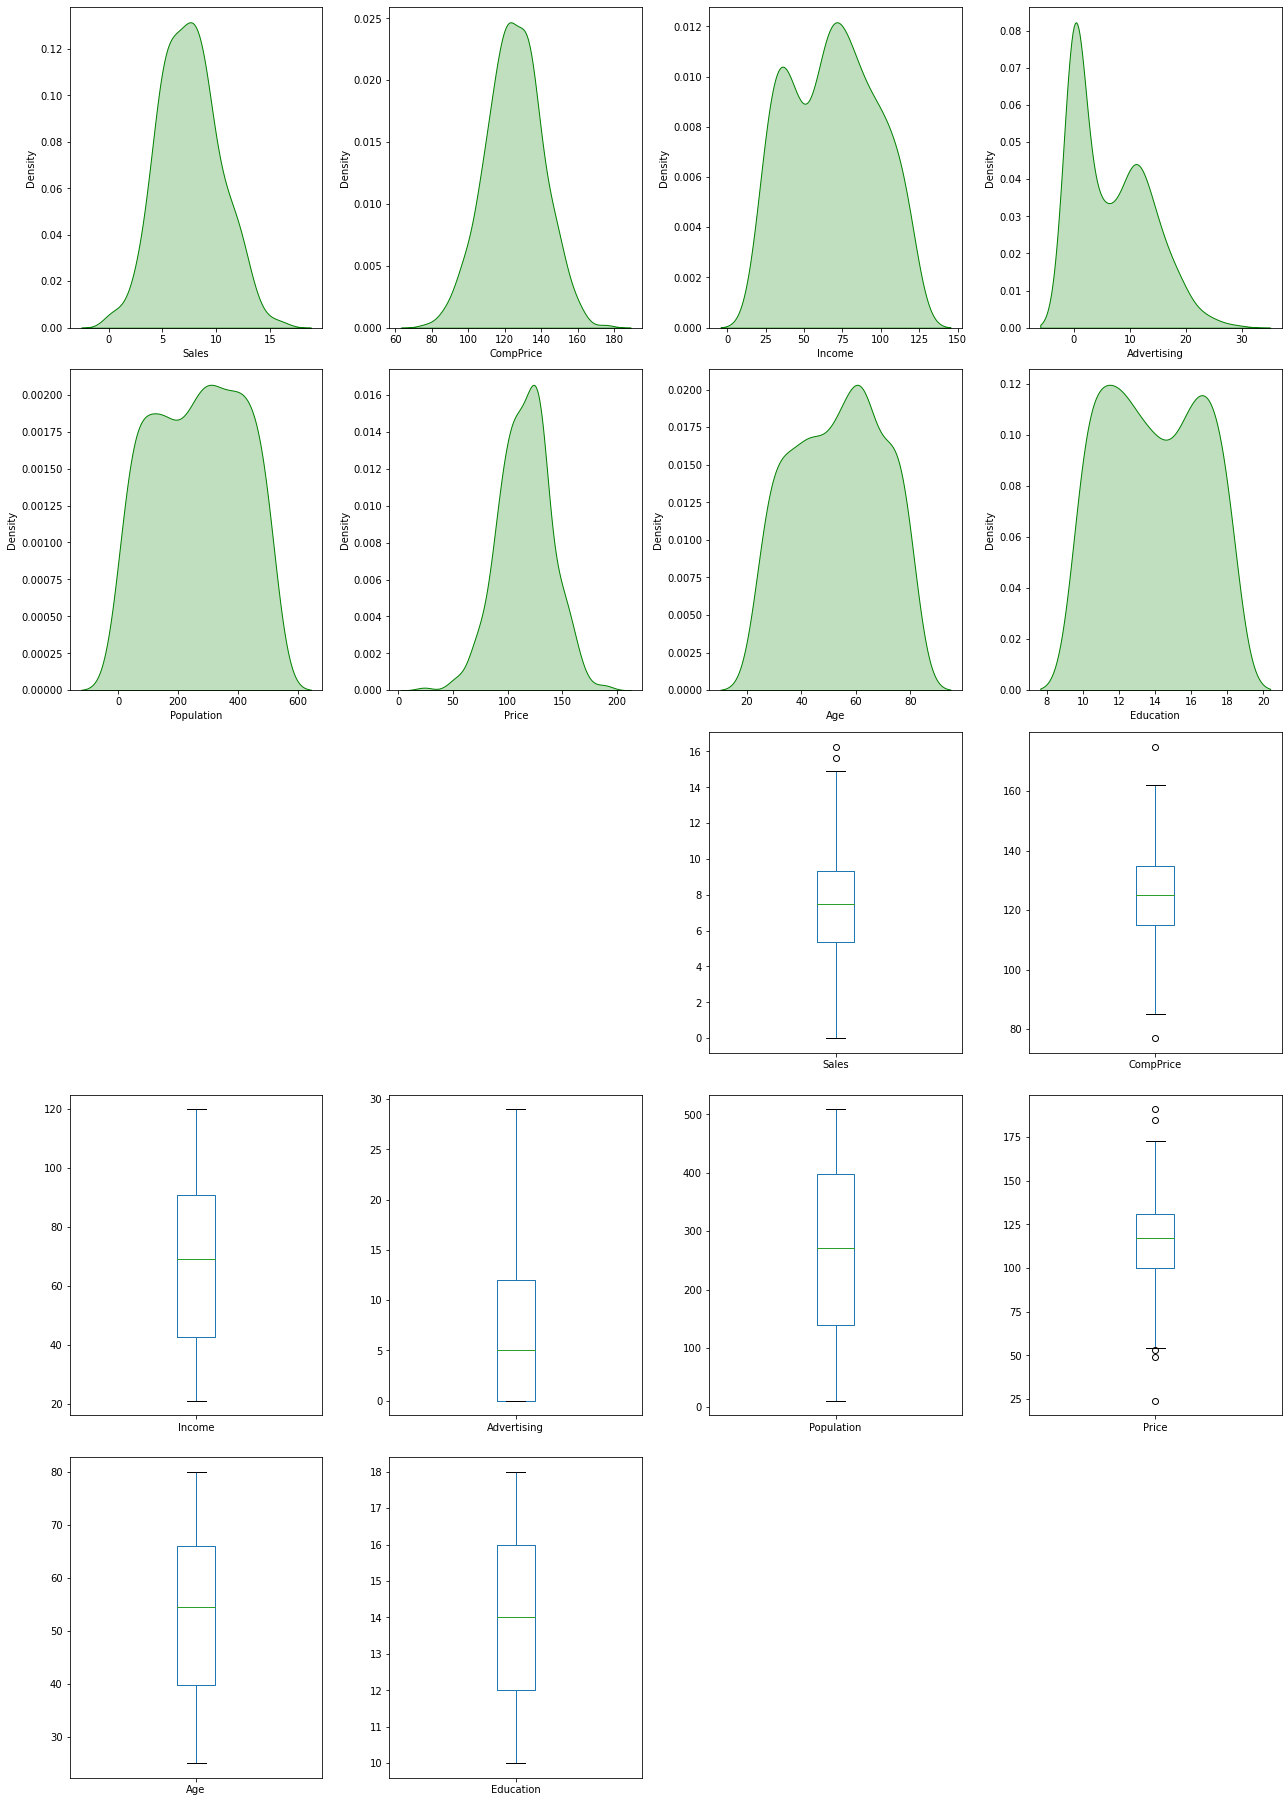

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [20]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(data[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    data[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = data[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [21]:
corr=data.corr()

In [22]:
data = pd.get_dummies(data, columns = ['ShelveLoc','Urban','US'])

<AxesSubplot:>

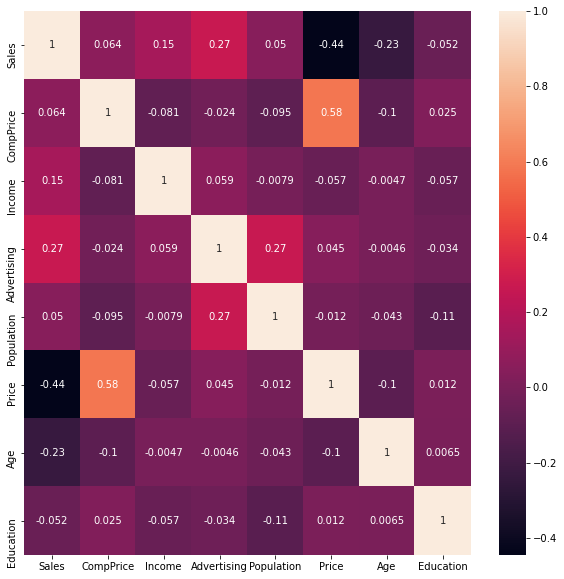

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [24]:
# decision tree model

In [ ]:
#<= 7.49 == "Small" and > 7.49 == "large"

In [25]:
data["sales"]="small"
data.loc[data["Sales"]>7.49,"sales"]="large"
data.drop(["Sales"],axis=1,inplace=True)

In [27]:
X = data.iloc[:,0:14]
y = data.iloc[:,14]

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y)

In [29]:
y_train.value_counts()

small    161
large    159
Name: sales, dtype: int64

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as DT
model = DT(criterion='entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [31]:
pred_train = model.predict(x_train)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,pred_train)

1.0

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,pred_train)

array([[159,   0],
       [  0, 161]], dtype=int64)

In [35]:
pred_test = model.predict(x_test)

In [36]:
pred_test

array(['large', 'large', 'small', 'small', 'small', 'small', 'small',
       'large', 'large', 'small', 'large', 'large', 'large', 'small',
       'small', 'small', 'large', 'small', 'large', 'large', 'small',
       'large', 'large', 'large', 'large', 'large', 'small', 'small',
       'small', 'large', 'large', 'small', 'small', 'small', 'small',
       'large', 'large', 'small', 'large', 'large', 'small', 'large',
       'large', 'small', 'small', 'large', 'small', 'small', 'small',
       'large', 'small', 'small', 'small', 'large', 'small', 'large',
       'small', 'small', 'large', 'large', 'large', 'large', 'large',
       'large', 'large', 'small', 'small', 'small', 'large', 'large',
       'small', 'small', 'large', 'small', 'small', 'small', 'small',
       'small', 'large', 'large'], dtype=object)

In [37]:
accuracy_score(y_test,pred_test)

0.8125

In [38]:
confusion_matrix(y_test,pred_test)

array([[32,  8],
       [ 7, 33]], dtype=int64)

In [40]:
data=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [41]:
data

,Actual,Predicted
181,small,large
49,large,large
61,small,small
394,small,small
288,small,small
...,...,...
276,small,small
85,large,small
261,small,small
1,large,large
